In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import misc, ndimage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
import warnings
warnings.filterwarnings('ignore')

## Load images and transform them into feature vectors

In [2]:
#%%time
x = []
y = []

for j in range(1,11):#63
    for k in range(1,56):#56
        if j<=9 and k<=9:
            image_filename = '../Datasets/Hand_drawn_characters/Sample00%d/img00%d-00%d.png'%(j,j,k)
        if j<=9 and k>9:
            image_filename = '../Datasets/Hand_drawn_characters/Sample00%d/img00%d-0%d.png'%(j,j,k)
        if j>9 and k<=9:
            image_filename = '../Datasets/Hand_drawn_characters/Sample0%d/img0%d-00%d.png'%(j,j,k)
        if j>9 and k>9:
            image_filename = '../Datasets/Hand_drawn_characters/Sample0%d/img0%d-0%d.png'%(j,j,k)
        #reading the image
        image = misc.imread(image_filename, flatten=True)
        #resizing 0.20 => from 900*1200 to 180*240
        image = misc.imresize(image,0.20) 
        #finding the object
        objs = ndimage.find_objects(image - image.max()) #use of negative image to find the object
        image = image[int(objs[0][0].start):int(objs[0][0].stop),int(objs[0][1].start):int(objs[0][1].stop)]
        #zooming to 90x60
        h = 91.0/image.shape[0]
        l = 61.0/image.shape[1]
        image = ndimage.zoom(image,(h,l))
        #flattening to one dimensional vector
        image = image[0:90,0:60].reshape(90*60).astype('float32')
        x.append(image)
        y.append(j)

## Convert lists to arrays

In [3]:
x = np.array(x)
x.shape

(550, 5400)

In [4]:
y = np.array(y)
y.shape

(550,)

## Scale the features

In [5]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

## Dimensionality Reduction with PCA

In [6]:
%%time
pca = PCA(n_components=2)
x_red = pca.fit_transform(x)

CPU times: user 148 ms, sys: 0 ns, total: 148 ms
Wall time: 150 ms


## Plot the first two PCA components

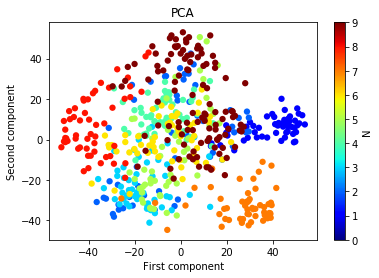

In [7]:
plt.scatter(x_red[:,0], x_red[:,1], cmap = "jet", c = y, marker = "o", edgecolor = "none", s = 40*np.ones(550), vmin = 0, vmax = 9)
cbar = plt.colorbar()
cbar.set_label("N")
cbar.set_ticks([0,1,2,3,4,5,6,7,8,9])
plt.title('PCA')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.show()

## Dimensionality Reduction with Isomap

In [8]:
%%time
isomap = Isomap(n_neighbors=5, n_components=2)
x_reduced = isomap.fit_transform(x)

CPU times: user 2.33 s, sys: 96 ms, total: 2.42 s
Wall time: 2.31 s


## Plot the first two Isomap principal components

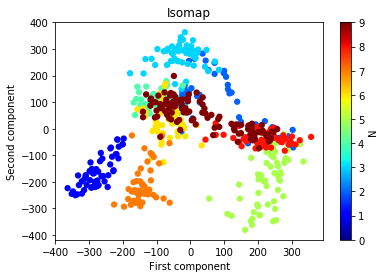

In [9]:
plt.scatter(x_reduced[:,0], x_reduced[:,1], cmap = "jet", c = y, marker = "o", edgecolor = "none", s = 40*np.ones(550), vmin = 0, vmax = 9)
cbar = plt.colorbar()
cbar.set_label("N")
cbar.set_ticks([0,1,2,3,4,5,6,7,8,9])
plt.title('Isomap')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.show()